# **DATA IMPORTATION**

In [ ]:
# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Now we need to read in the data

from google.colab import files
uploaded = files.upload()

Saving penguin size.csv to penguin size (5).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['penguin size (5).csv']))

In [ ]:
# Now let's take a look at the data

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
# To check for the number of rows and columns

df.shape

(343, 7)

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# **DATA CLEANING**

In [ ]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

species - 0%
island - 0%
culmen_length_mm - 0%
culmen_depth_mm - 0%
flipper_length_mm - 0%
body_mass_g - 0%
sex - 3%


In [ ]:
# We need to see if we have any missing data
#we will use .null to find the missing values

print (df.isnull().sum())

species              0
island               0
culmen_length_mm     1
culmen_depth_mm      1
flipper_length_mm    1
body_mass_g          1
sex                  9
dtype: int64


In [ ]:
## dropping columns that have null values

df.dropna(inplace=True)

In [ ]:
# lets check for Null values again to see if changes have been effected

print (df.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [ ]:
# check for column Data Types

print(df.dtypes)

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [ ]:
#change datatype
# for flipper_length_mm column and body_mass_g column
#convert from float to int

df ['flipper_length_mm'] = df ['flipper_length_mm'].astype(int)
df ['body_mass_g'] = df ['body_mass_g'].astype(int)

In [ ]:
# lets check for column Data Types again to see if changes have been effected

print(df.dtypes)

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm      int64
body_mass_g            int64
sex                   object
dtype: object


In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


In [ ]:
# Order our Data a little bit to see

df.sort_values(by=['species'], inplace=False, ascending=False)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
342,Gentoo,Biscoe,49.9,16.1,213,5400,MALE
279,Gentoo,Biscoe,45.3,13.8,208,4200,FEMALE
250,Gentoo,Biscoe,42.8,14.2,209,4700,FEMALE
251,Gentoo,Biscoe,45.1,14.5,207,5050,FEMALE
252,Gentoo,Biscoe,59.6,17.0,230,6050,MALE
...,...,...,...,...,...,...,...
103,Adelie,Biscoe,37.9,18.6,193,2925,FEMALE
102,Adelie,Biscoe,37.8,20.0,190,4250,MALE
101,Adelie,Biscoe,37.7,16.0,183,3075,FEMALE
100,Adelie,Biscoe,41.0,20.0,203,4725,MALE


# **EXPORATORY DATA ANALYSIS (EDA)**

In [ ]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')



<ipython-input-61-fd7d354823f3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson')


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


In [ ]:
df.corr(method ='spearman')

<ipython-input-62-b3d2d6ba4d44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='spearman')


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.214885,0.668695,0.576048
culmen_depth_mm,-0.214885,1.000000,-0.519558,-0.432280
flipper_length_mm,0.668695,-0.519558,1.000000,0.841453
body_mass_g,0.576048,-0.432280,0.841453,1.000000


<ipython-input-76-8204d80ffa30>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method ='pearson')


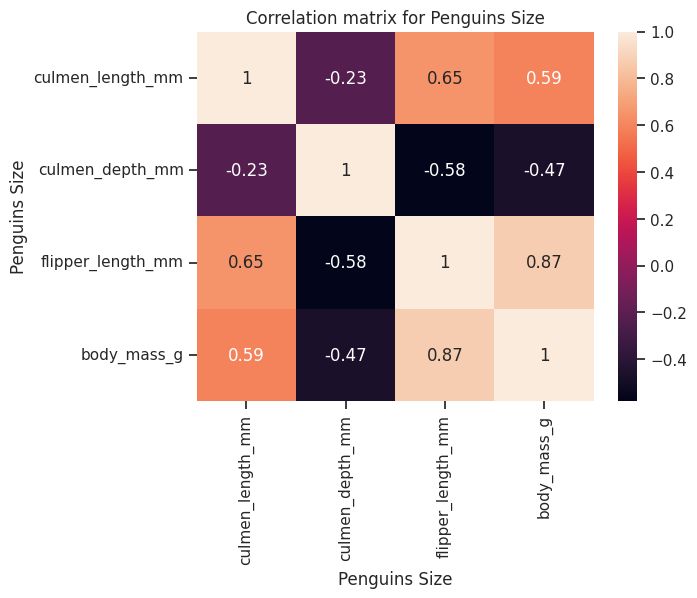

In [ ]:
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Penguins Size")

plt.xlabel("Penguins Size")

plt.ylabel("Penguins Size")

plt.show()

<ipython-input-75-3311ffc3b4da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_spearman = df.corr(method ='spearman')


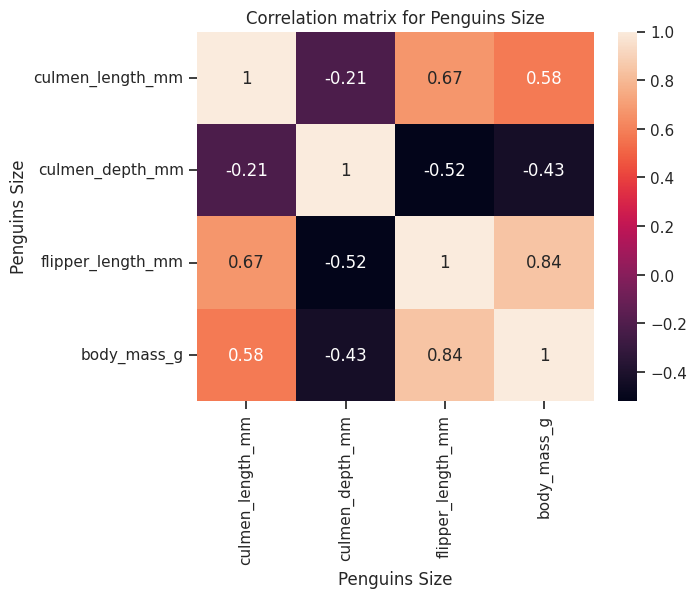

In [ ]:
correlation_matrix_spearman = df.corr(method ='spearman')

sns.heatmap(correlation_matrix_spearman, annot = True)

plt.title("Correlation matrix for Penguins Size")

plt.xlabel("Penguins Size")

plt.ylabel("Penguins Size")

plt.show()

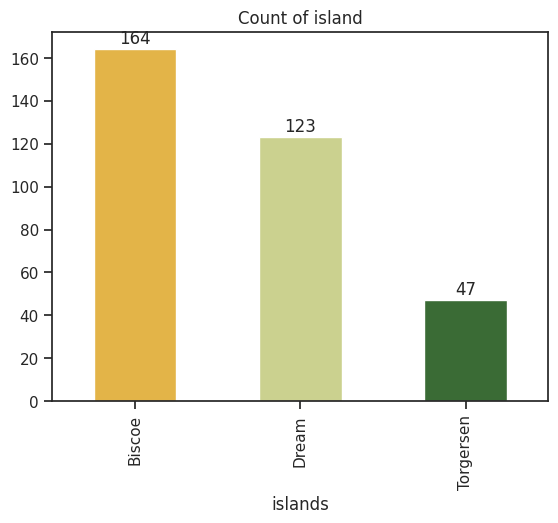

In [ ]:
# Your code to create the bar plot
df['island'].value_counts().plot(kind='bar', color=['#E3B448', '#CBD18F', '#3A6B35'])
plt.title('Count of island')
plt.xlabel('islands')

# Adding data labels
counts = df['island'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()


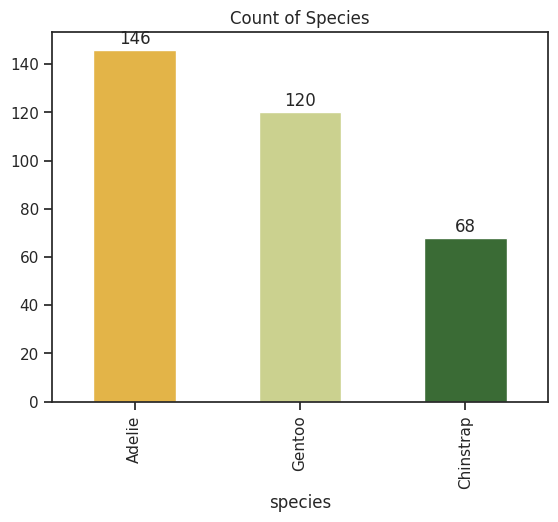

In [ ]:
# Your code to create the bar plot

df['species'].value_counts().plot(kind='bar',color=['#E3B448','#CBD18F','#3A6B35'])
plt.title ('Count of Species')
plt.xlabel('species')

# Adding data labels
counts = df['species'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

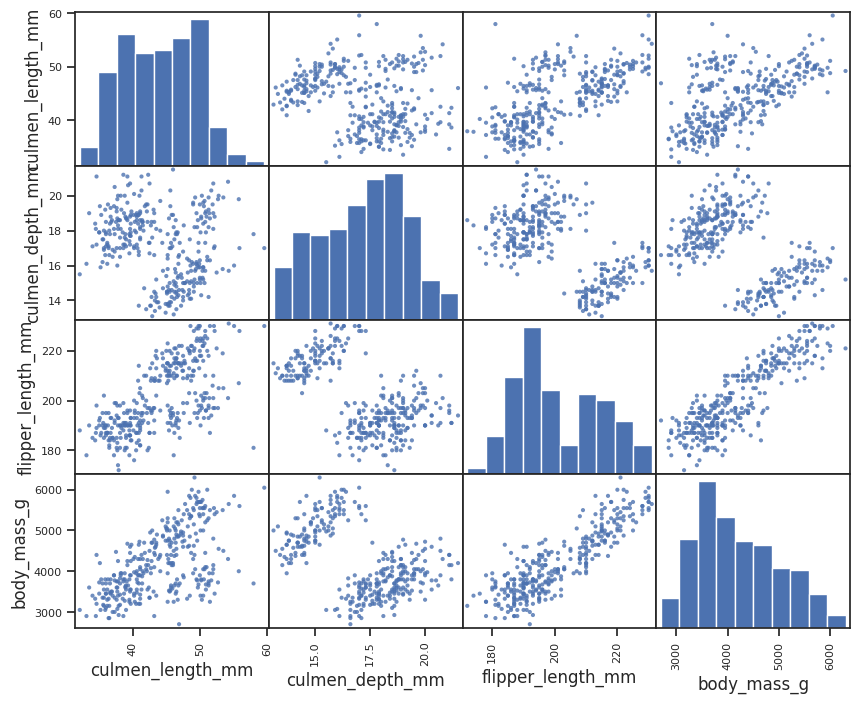

In [ ]:
# Create scatter matrix
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(10, 8), diagonal='hist')
plt.show()

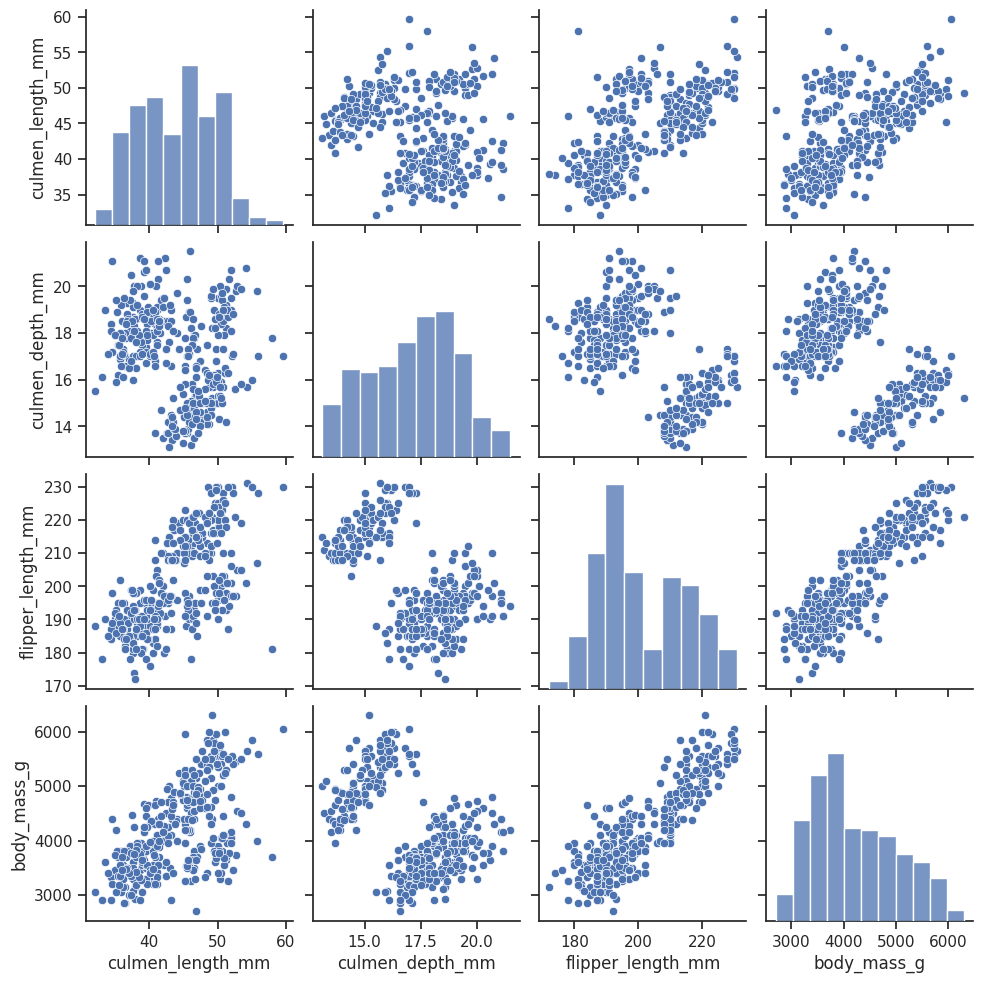

In [ ]:
# Create scatter plot using Seaborn
sns.set(style='ticks')
scatter_plot = sns.pairplot(df, kind='scatter', diag_kind='hist')

plt.show()



